    ### LAB.1 

Filippo Cucchetto 2110510

I create a loop since all data is made with a common syntax "JC-number-citibike-tripdata", I save these dataframe as "run" "number" where number goes from 02 to 06

In [1]:
number_list= c("02","03","04","05","06")
n_file=paste("./JC-", "2019", "02", "-citibike-tripdata.csv", sep="")
list_df=list()


In [2]:
i=1
for (p in number_list){
    #print(p)
    n_file=paste("./JC-","2019",p,"-citibike-tripdata.csv",sep="")
    #print(n_file)
    df_name=paste("run",p,sep="")
    #print(df_name)
    assign(df_name,read.csv(n_file))
    list_df[[i]]=assign(df_name,read.csv(n_file))
    i=i+1
    }

Now I merge dataframes into one dataframe called "unique_df"

In [4]:
i=2
unique_df=run02

for (i in 2:5){
    file_name=paste("run",p,sep="")
    temp=list_df[[i]]
    unique_df=rbind(unique_df,temp)
    i=i+1
    }

4.1 I compute the mean and the median in minutes

In [5]:
mean_df_trip=floor(mean(unique_df$"tripduration")/60)

median_df_trip=floor(median(unique_df$"tripduration")/60)

cat("The mean of the tripduration is:",mean_df_trip,"min\n")
cat("The median of the tripduration is:",median_df_trip,"min\n")

The mean of the tripduration is: 12 min
The median of the tripduration is: 5 min


4.2 Minimum and maximumn tripduration

In [6]:
max_df_trip=floor(max(unique_df$"tripduration")/60)
min_df_trip=floor(min(unique_df$"tripduration")/60)

cat("The maximum of the tripduration is ", max_df_trip,"min\n")
cat("The minimum of the tripduration is ", min_df_trip,"min\n")

The maximum of the tripduration is  28817 min
The minimum of the tripduration is  1 min


The maximum value is definitely wrong, since it is almost 480 hours of biking.
4.3 I scrimm the dataframe


In [7]:
three_hours=3*60*60
filtered_df=unique_df[unique_df["tripduration"] < three_hours, ]

In [8]:

f_mean_df_trip=floor(mean(filtered_df[["tripduration"]])/60)

f_median_df_trip=floor(median(filtered_df$"tripduration")/60)

cat("The mean of the tripduration is:",f_mean_df_trip,"min\n")
cat("The median of the tripduration is:",f_median_df_trip,"min\n")

f_max_df_trip=(max(filtered_df$"tripduration"))
f_min_df_trip=(min(filtered_df$"tripduration"))

cat("The maximum of the tripduration is ", f_max_df_trip,"s\n")
cat("The minimum of the tripduration is ", f_min_df_trip,"s\n")

The mean of the tripduration is: 9 min
The median of the tripduration is: 5 min
The maximum of the tripduration is  10798 s
The minimum of the tripduration is  61 s


4.4 Trip Durations after the skimming

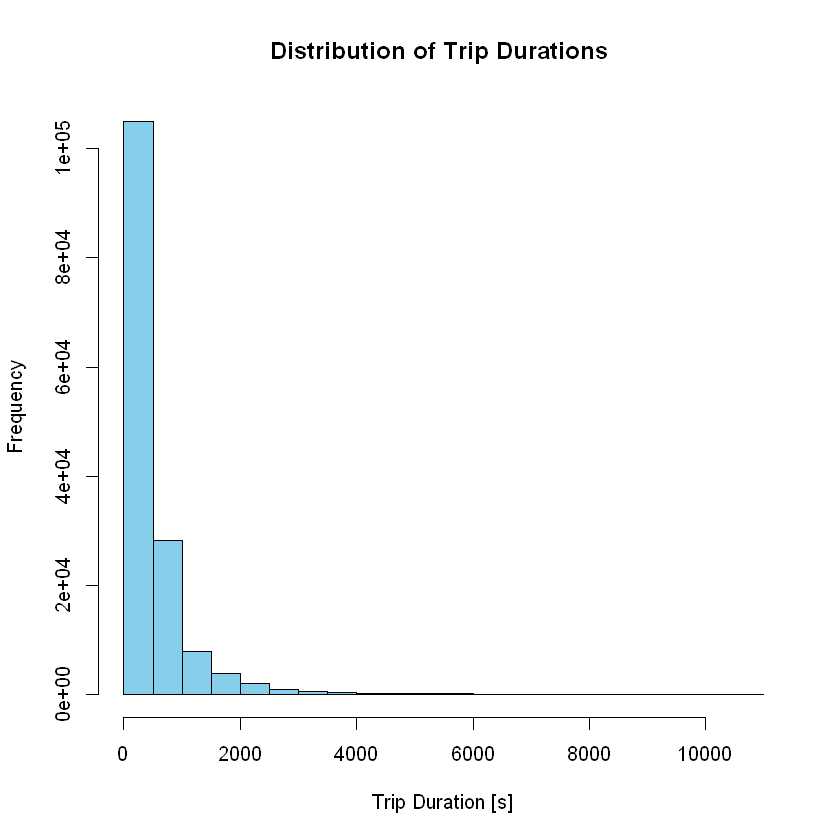

In [11]:
hist(filtered_df$tripduration ,col = "skyblue", border = "black",
     xlab = "Trip Duration [s]", ylab = "Frequency",
     main = "Distribution of Trip Durations ")

In [12]:
i=1
list_avg=list()
for(run in list_df){
    avg=floor(mean(run[["tripduration"]])/60)
    list_avg[[i]]=avg
    i=i+1
}

In [13]:
y=unlist(list_avg)
x=c("February","March","April","May","June")


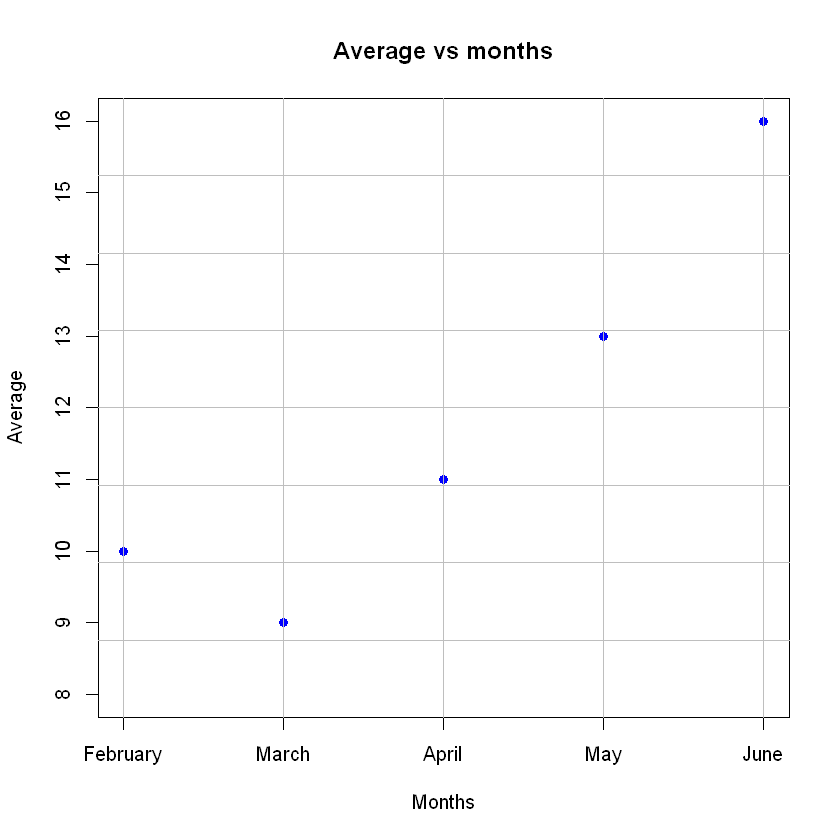

In [14]:
plot(y, type = "p",pch=19, ylim = c(8, max(y)),col="blue",xaxt = "n", xlab = "Months", ylab = "Average", main = "Average vs months")
axis(1, at = 1:length(x), labels =x)
axis(2, at = pretty(y), labels = pretty(y))
grid(nx=NULL,ny=8,lty=1,col="gray")

6.1 Below I plot the rides per day 

I use the function "weekdays" to get the weekdays starting from the date present in the startitme column of the dataframe, then I create a table where I count each time that particular weekday is present inside the "days" variable

In [15]:
weekdays_list=c("Monday,Tuesday,Wendsday,Thursday,Friday,Saturday,Sunday")
dev_null=Sys.setlocale("LC_TIME", "english") # print days in english
days=weekdays(as.Date(unique_df[["starttime"]]))
counts_ofweekdays=table(days)


In [16]:
counts_ofweekdaysdf=as.data.frame(counts_ofweekdays) 

I reorder the dataframe according to the correct order of the  week. And I plot the Histogram of Frequency over days


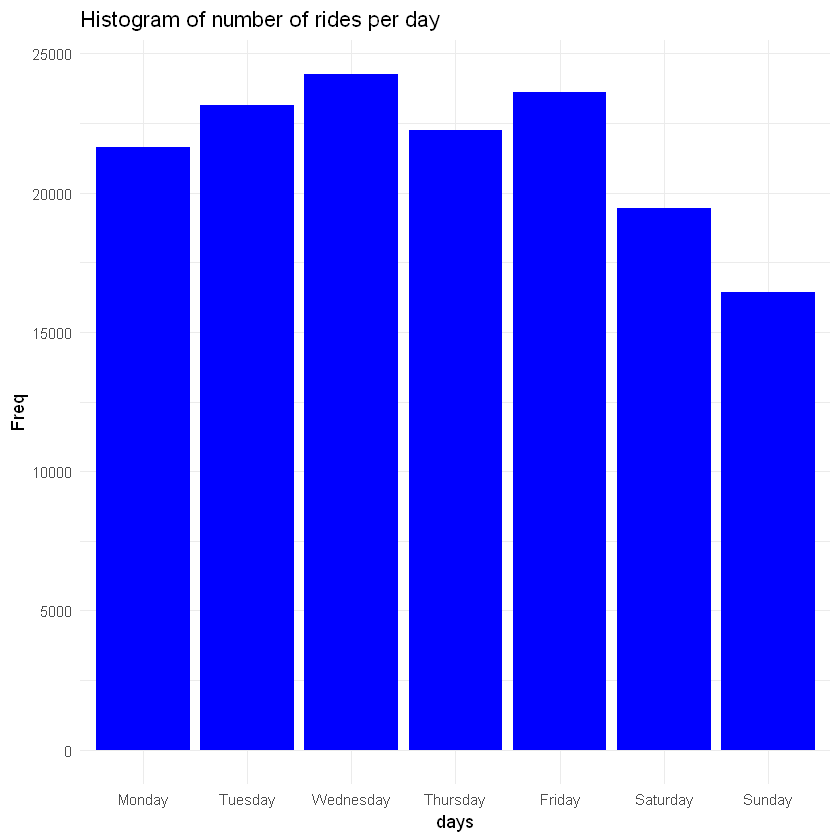

In [17]:
counts_ofweekdaysdf$days=ordered(counts_ofweekdaysdf$days, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", 
"Friday", "Saturday", "Sunday")) #reordering the dataframe according to (monday,tuesday etc.)

library(ggplot2)

days=factor(days, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
a=ggplot(data=counts_ofweekdaysdf, aes(x=days, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ theme_minimal()+ggtitle("Histogram of number of rides per day")
a

6.2) plot the hourly distribution on weekdays and on weekends

Using "str_split_fixed" I divide the column "starttime", into two new columns of the dataframe "Day" and "Time"

In [21]:
library(stringr)
unique_df[c("Day","Time")]=str_split_fixed(unique_df$starttime," ",2)


Then I divide again the colum Time into three columns "Hour","Minutes","Sec" in this way I can easyly manipulate the data related to the hours. 

In [22]:
new_unique_df=unique_df
new_unique_df$Day=weekdays(as.Date(unique_df$Day))
new_unique_df[c("Hour","Minutes","Sec")]=str_split_fixed(unique_df$Time,":",3)

I create two dataframes "weekend_df" and "not_weekends_df" and I filter them dropping out the not wanted days of the week

In [24]:
weekends_df=new_unique_df
not_weekends_df=new_unique_df

In [25]:
weekends_df=dplyr::filter(weekends_df, Day=="Saturday" | Day=="Sunday")
not_weekends_df=dplyr::filter(not_weekends_df, Day!="Saturday" & Day!="Sunday")

In [26]:
weekends_hours=as.data.frame(table(weekends_df$Hour))
not_weekends_hours=as.data.frame(table(not_weekends_df$Hour))
colnames(not_weekends_hours)[1]="Hour"
colnames(weekends_hours)[1]="Hour"

In [27]:
week_distribution=ggplot(data=not_weekends_hours, aes(x=Hour, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ theme_minimal()+ggtitle("Hourly distribution from Monday to Friday")

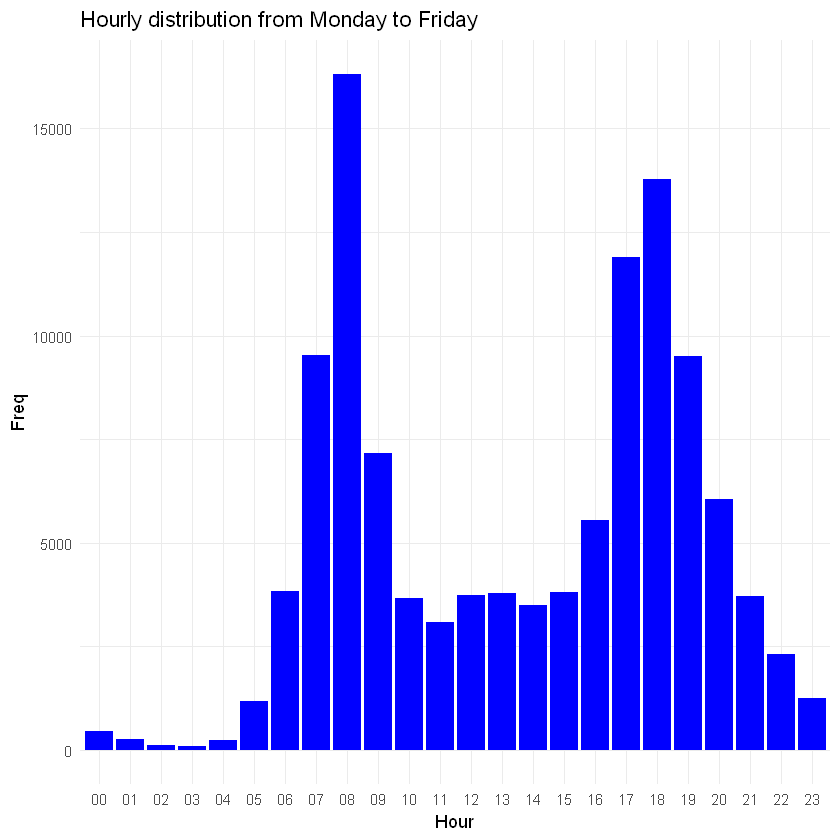

In [28]:
week_distribution

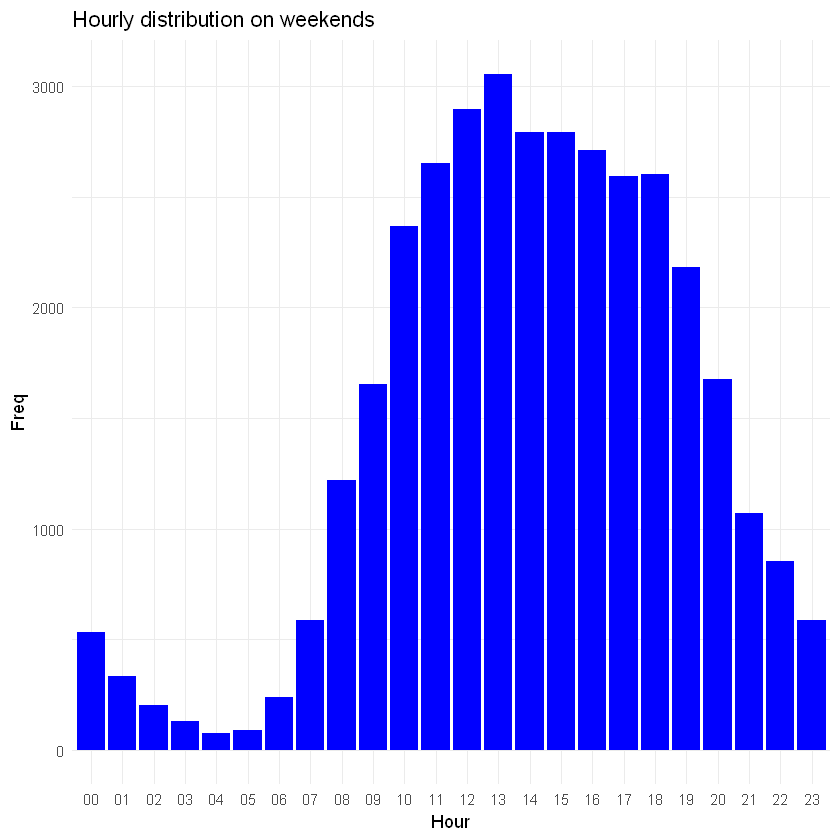

In [29]:
weekend_distribution=ggplot(data=weekends_hours, aes(x=Hour, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ theme_minimal()+ggtitle("Hourly distribution on weekends")
weekend_distribution

6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber
users

In [30]:
customer_df=new_unique_df
subscriber_df=new_unique_df
#filtro tra customer e subscriber
customer_df=dplyr::filter(customer_df,usertype=="Customer")
subscriber_df=dplyr::filter(subscriber_df,usertype=="Subscriber")
#filtro tra weekdays e weekends
customer_df=dplyr::filter(customer_df,Day!="Saturday" & Day!="Sunday")
subscriber_df=dplyr::filter(subscriber_df,Day!="Saturday" & Day!="Sunday")
#conto
customer_hours=as.data.frame(table(customer_df$Hour))
subscriber_hours=as.data.frame(table(subscriber_df$Hour))
colnames(customer_hours)[1]="Hour"
colnames(subscriber_hours)[1]="Hour"

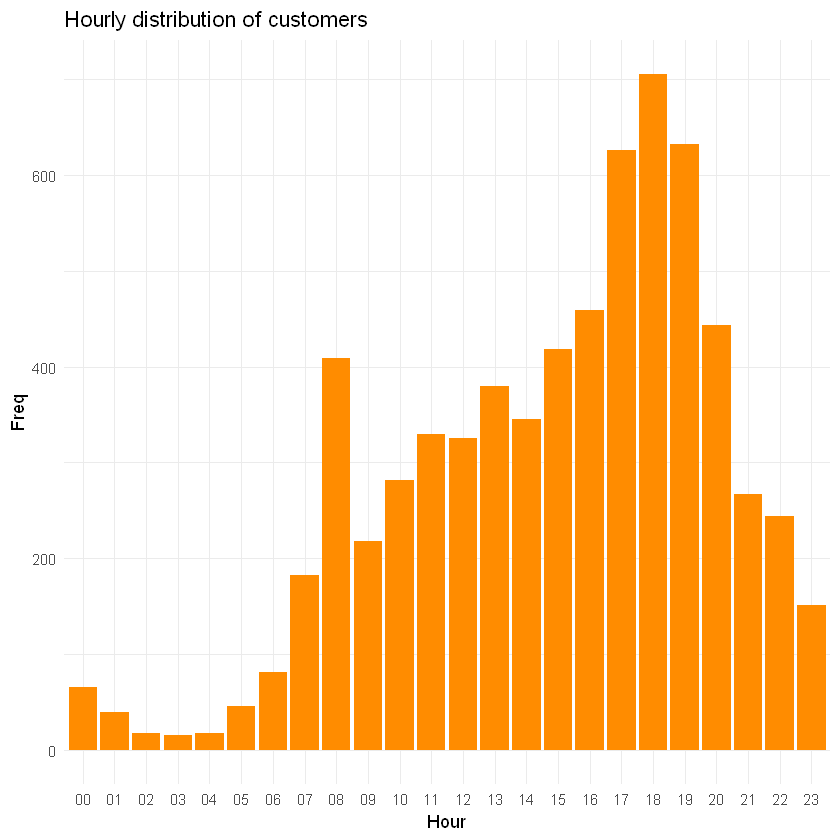

In [31]:
customer_plot=ggplot(data=customer_hours, aes(x=Hour, y=Freq)) +
  geom_bar(stat="identity",fill = "#ff8c00")+ theme_minimal()+ggtitle("Hourly distribution of customers")
customer_plot

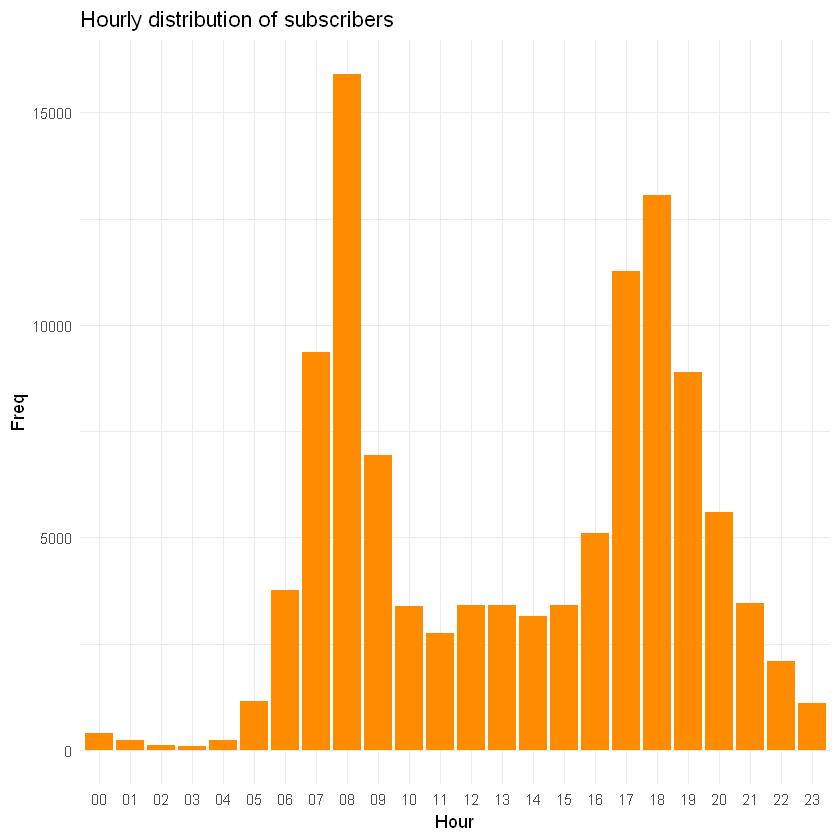

In [32]:
subscriber_plot=ggplot(data=subscriber_hours, aes(x=Hour, y=Freq)) +
  geom_bar(stat="identity",fill = "#ff8c00")+ theme_minimal()+ggtitle("Hourly distribution of subscribers")
subscriber_plot  

7.1) using the latitude and longitude information, evaluate the average speed (in km/h) of a user,discarding the trip lasting longer than 1 hour

First I filter my dataframe dropping the trips longer than 1 hour

In [33]:
one_hour_df=new_unique_df
one_hour_df=dplyr::filter(one_hour_df,tripduration<60*60)


Then using distHaversine function I compute the distance between the starting station and the end station

In [34]:
library(geosphere)
one_hour_df$dist=(distHaversine(cbind(one_hour_df$start.station.latitude,one_hour_df$start.station.longitude),
cbind(one_hour_df$end.station.latitude,one_hour_df$end.station.longitude)))

I compute the velocity and  I create a new column in the "one_hour_df" in which I add all the velocities

In [36]:
one_hour_df$velocity=velocity=one_hour_df$dist/one_hour_df$tripduration

7.2) plot the average speed as a function of route length for the following group of distances d <500 m,
500 m <d <1000 m, 1000 m <d <2000 m, 2000 m <d <3000 m, d >3000 m and discarding
trips longer than 1 hour

For a given distance I compute the average speed and save it in a list called "velocities". Also I use "unique" method to take every possible values of distances between starting point and ending point one time only

In [38]:
distances=(unique(one_hour_df$dist))  
velocities=list()
j=1
for(i in distances){
    temp_df=dplyr::filter(one_hour_df,dist==i)
    avg_velocity=mean(temp_df$velocity)
    velocities[[j]]=avg_velocity
    j=j+1
}

I create a dataframe of distances and velocities

In [39]:
dist_vel_df=data.frame(dist=distances,average_velocity=unlist(velocities))

In [40]:
df_500=dplyr::filter(dist_vel_df,dist_vel_df$dist<500)
df_500_1000=dplyr::filter(dist_vel_df,dist_vel_df$dist>500 & dist_vel_df$dist<1000)
df_1000_2000=dplyr::filter(dist_vel_df,dist_vel_df$dist>1000 & dist_vel_df$dist<2000)
df_2000_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>2000 & dist_vel_df$dist<3000)
df_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>3000)

Below I report the plots:

In [41]:
colnames(df_500)[2]="average_velocity"
colnames(df_500_1000)[2]="average_velocity"
colnames(df_1000_2000)[2]="average_velocity"
colnames(df_2000_3000)[2]="average_velocity"
colnames(df_3000)[2]="average_velocity"

In [46]:
a=ggplot(df_500, aes(x=dist, y=average_velocity)) + geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500$average_velocity), max(df_500$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 0 to 500")+ xlab("Distances [m]")
b=ggplot(df_1000_2000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500_1000$average_velocity), max(df_500_1000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 500 to 1000")+ xlab("Distances [m]")
c=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_1000_2000$average_velocity), max(df_1000_2000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 1000 to 2000")+ xlab("Distances [m]")
d=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point()+theme_minimal() +   scale_y_continuous(breaks = seq(min(df_2000_3000$average_velocity), max(df_2000_3000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 2000 to 3000")+ xlab("Distances [m]")
e=ggplot(df_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_3000$average_velocity), max(df_3000$average_velocity), by = 0.3))+xlim(2500,7500)+ylim(1,8)+ggtitle("Velocities vs Distances from 3000")+ xlab("Distances [m]")


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


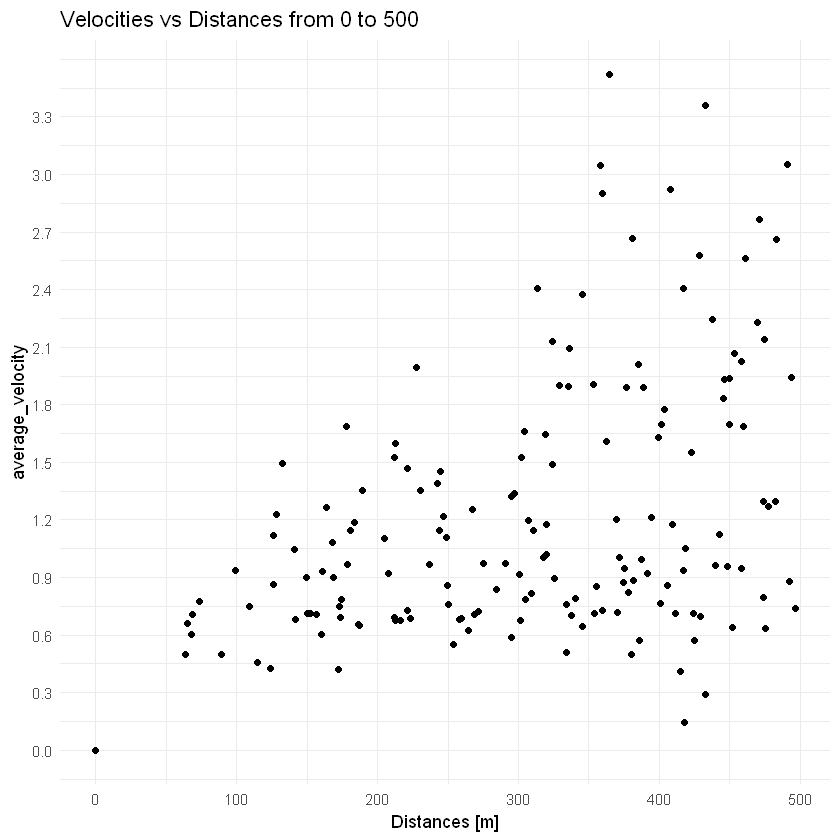

In [45]:
a

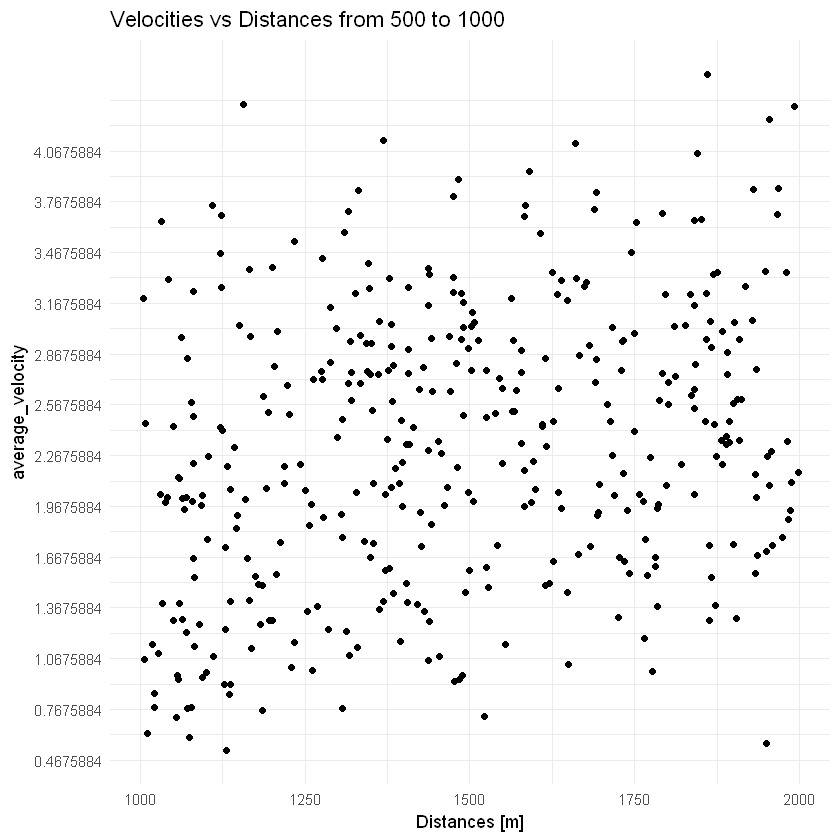

In [47]:
b

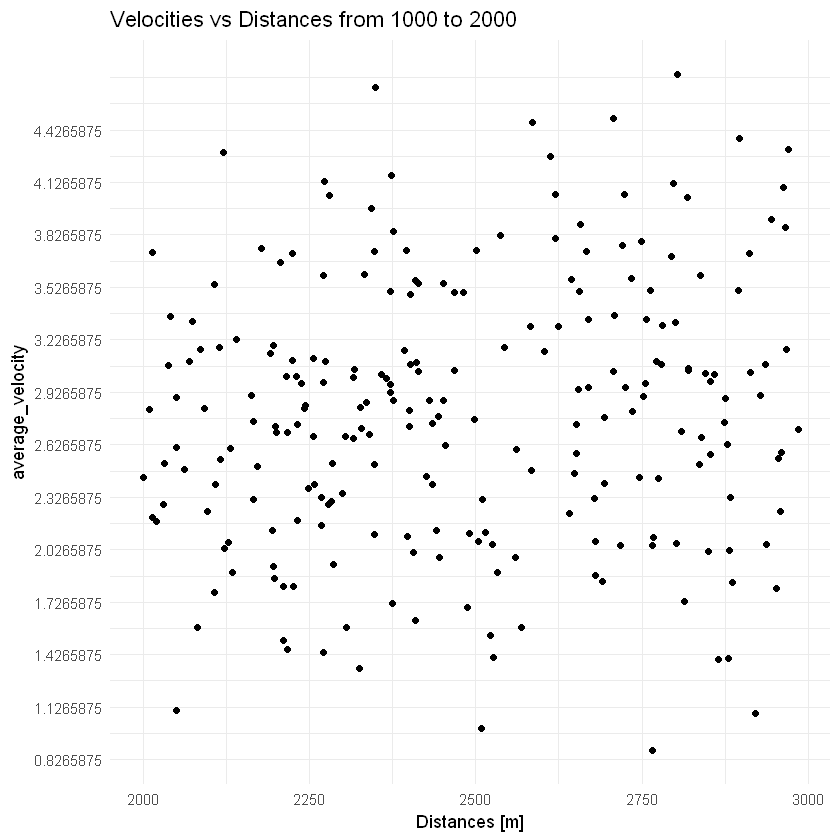

In [48]:
c

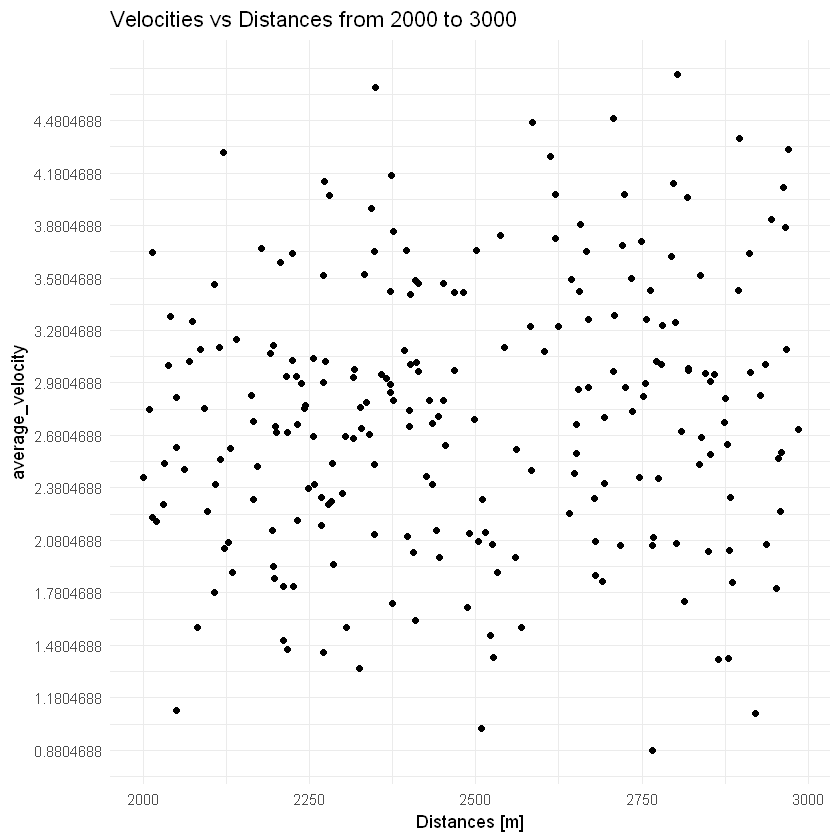

In [49]:
d

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


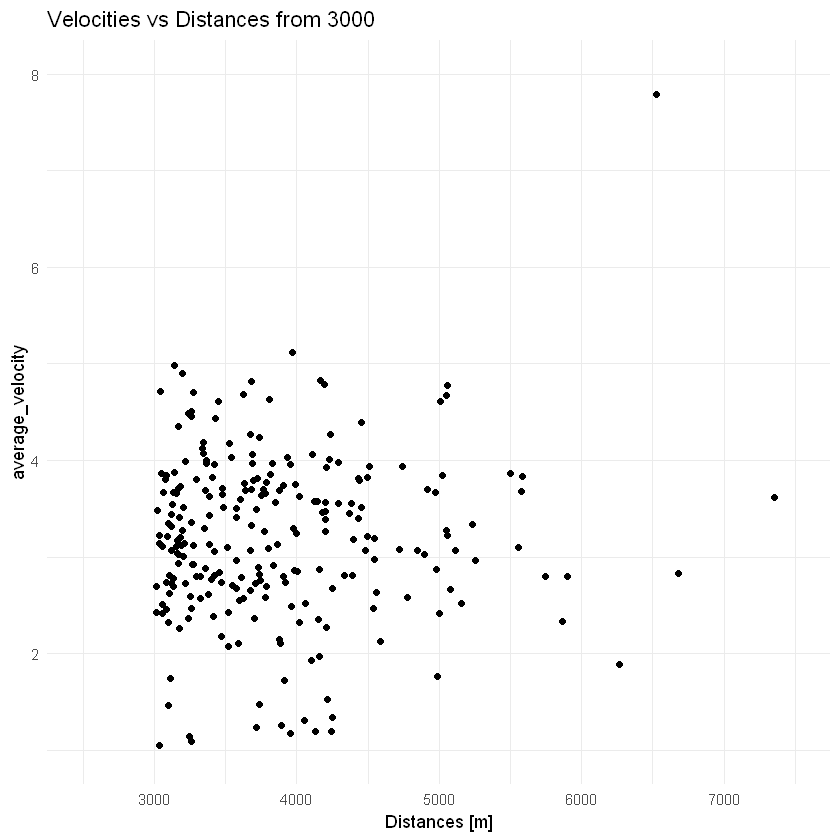

In [50]:
e

7.3) Repeat the same graph, but show the results obtained separately for weekdays and weekends

I start with weekends


In [51]:
week_end_df=dplyr::filter(one_hour_df,Day=="Saturday" | Day=="Sunday")

distances=(unique((week_end_df$dist)))
velocities=list()
j=1
for(i in distances){
    temp_df=dplyr::filter(week_end_df,dist==i)
    avg_velocity=mean(temp_df$velocity)
    velocities[[j]]=avg_velocity
    j=j+1
}
dist_vel_df=data.frame(dist=distances,average_velocity=unlist(velocities))

df_500=dplyr::filter(dist_vel_df,dist_vel_df$dist<500)
df_500_1000=dplyr::filter(dist_vel_df,dist_vel_df$dist>500 & dist_vel_df$dist<1000)
df_1000_2000=dplyr::filter(dist_vel_df,dist_vel_df$dist>1000 & dist_vel_df$dist<2000)
df_2000_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>2000 & dist_vel_df$dist<3000)
df_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>3000)

colnames(df_500)[2]="average_velocity"
colnames(df_500_1000)[2]="average_velocity"
colnames(df_1000_2000)[2]="average_velocity"
colnames(df_2000_3000)[2]="average_velocity"
colnames(df_3000)[2]="average_velocity"

weekend_a=ggplot(df_500, aes(x=dist, y=average_velocity)) + geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500$average_velocity), max(df_500$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 0 to 500")+ xlab("Distances [m]")
weekend_b=ggplot(df_1000_2000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500_1000$average_velocity), max(df_500_1000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 500 to 1000")+ xlab("Distances [m]")
weekend_c=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_1000_2000$average_velocity), max(df_1000_2000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 1000 to 2000")+ xlab("Distances [m]")
weekend_d=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point()+theme_minimal() +   scale_y_continuous(breaks = seq(min(df_2000_3000$average_velocity), max(df_2000_3000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 2000 to 3000")+ xlab("Distances [m]")
weekend_e=ggplot(df_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_3000$average_velocity), max(df_3000$average_velocity), by = 0.3))+xlim(2500,7500)+ylim(1,8)+ggtitle("Velocities vs Distances from 3000")+ xlab("Distances [m]")


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


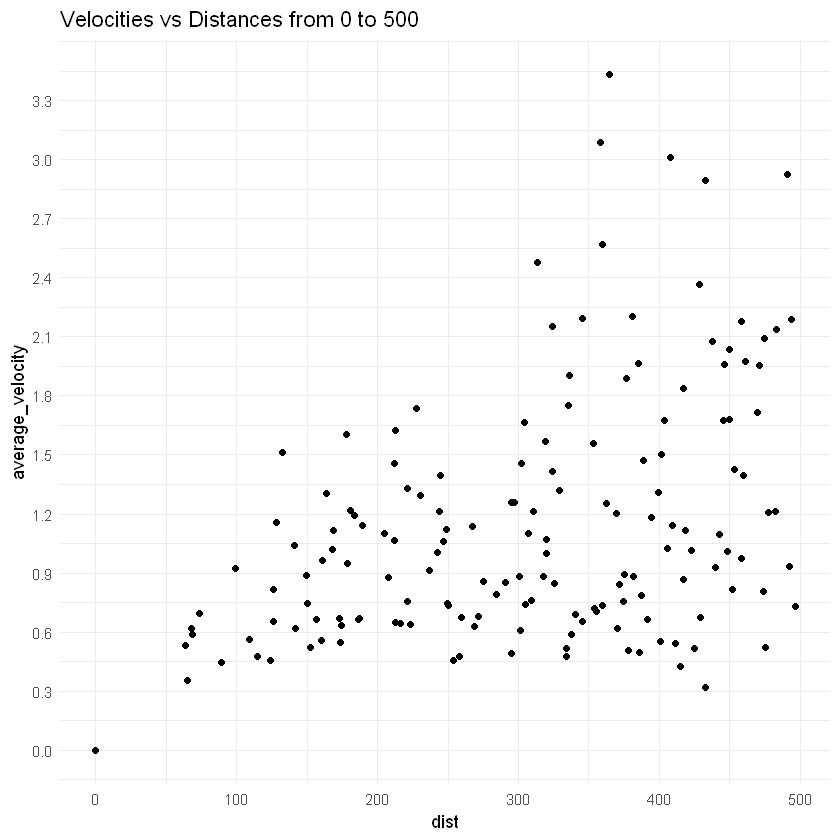

In [52]:
weekend_a

In [53]:
not_week_end_df=dplyr::filter(one_hour_df,Day!="Saturday" & Day!="Sunday")

distances=(unique((not_week_end_df$dist)))
velocities=list()
j=1
for(i in distances){
    temp_df=dplyr::filter(not_week_end_df,dist==i)
    avg_velocity=mean(temp_df$velocity)
    velocities[[j]]=avg_velocity
    j=j+1
}
dist_vel_df=data.frame(dist=distances,average_velocity=unlist(velocities))

df_500=dplyr::filter(dist_vel_df,dist_vel_df$dist<500)
df_500_1000=dplyr::filter(dist_vel_df,dist_vel_df$dist>500 & dist_vel_df$dist<1000)
df_1000_2000=dplyr::filter(dist_vel_df,dist_vel_df$dist>1000 & dist_vel_df$dist<2000)
df_2000_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>2000 & dist_vel_df$dist<3000)
df_3000=dplyr::filter(dist_vel_df,dist_vel_df$dist>3000)

colnames(df_500)[2]="average_velocity"
colnames(df_500_1000)[2]="average_velocity"
colnames(df_1000_2000)[2]="average_velocity"
colnames(df_2000_3000)[2]="average_velocity"
colnames(df_3000)[2]="average_velocity"
a=ggplot(df_500, aes(x=dist, y=average_velocity)) + geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500$average_velocity), max(df_500$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 0 to 500")
b=ggplot(df_1000_2000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_500_1000$average_velocity), max(df_500_1000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 500 to 1000")
c=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_1000_2000$average_velocity), max(df_1000_2000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 1000 to 2000")
d=ggplot(df_2000_3000, aes(x=dist,y=average_velocity))+ geom_point()+theme_minimal() +   scale_y_continuous(breaks = seq(min(df_2000_3000$average_velocity), max(df_2000_3000$average_velocity), by = 0.3))+ggtitle("Velocities vs Distances from 2000 to 3000")
e=ggplot(df_3000, aes(x=dist,y=average_velocity))+ geom_point() +theme_minimal() +   scale_y_continuous(breaks = seq(min(df_3000$average_velocity), max(df_3000$average_velocity), by = 0.3))+xlim(2500,7500)+ylim(1,8)+ggtitle("Velocities vs Distances from 3000")


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


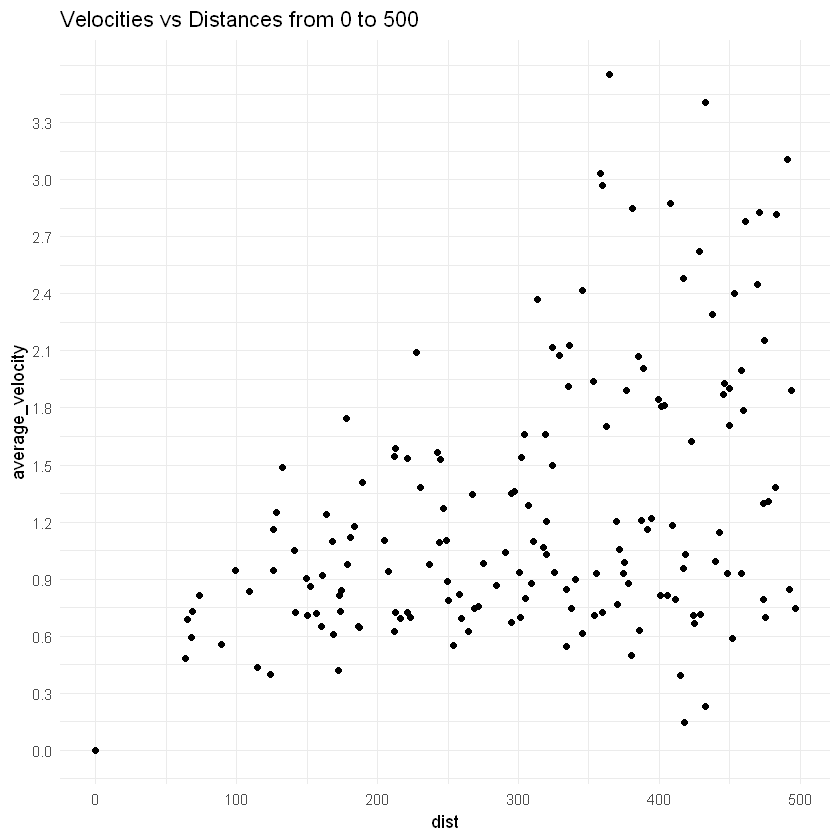

In [54]:
a

8.1) find the most common start station and the least popular end station

I use the  "names" function to get the station name associated with the minimum (or maximum) count of occurrences in the corresponding column."

In [56]:

max_station=names(which.max(table(unique_df$start.station.name)))

cat("The most common start station is:",max_station, "\n")

min_end_station=names(which.min(table(unique_df$end.station.name)))

cat("The least favorite end station is:",min_end_station, "\n")

The most common start station is: Grove St PATH 
The least favorite end station is: 1 Ave & E 16 St 


8.2) show the distribution of start stations

In [57]:
startstations=as.data.frame(table(unique_df$start.station.name))

endstations=as.data.frame(table(unique_df$end.station.name))

colnames(startstations)[1]="Start_station_name"
colnames(endstations)[1]="End_station_name"


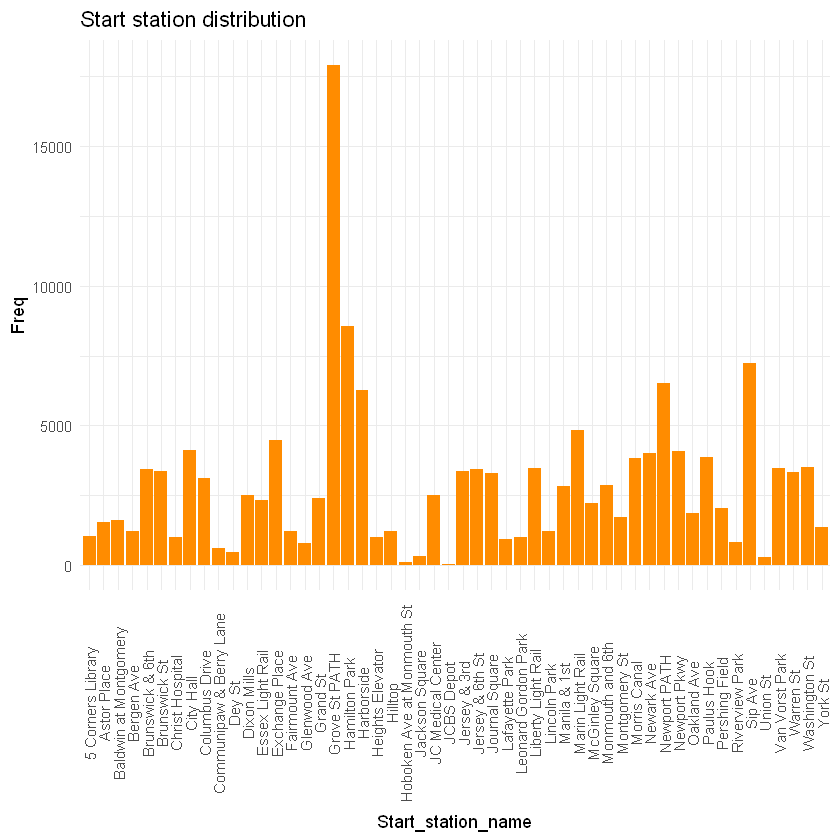

In [58]:
plot_startstations=ggplot(data=startstations, aes(x=Start_station_name, y=Freq)) +
  geom_bar(stat="identity",fill = "#ff8c00")+ theme_minimal()+ggtitle("Start station distribution")+theme(axis.text.x=element_text(angle = 90, vjust = 0.5))

plot_startstations

8.3) find the three most common routes (start and end station) and the three least popular ones

In [60]:
unique_df["start_end"]=paste(unique_df$start.station.name,"to",unique_df$end.station.name)

path_counts=table(unique_df["start_end"])
sort_path=sort(path_counts, decreasing = TRUE)

cat("The three most common paths(from the most favorite) are ","\n",names(sort_path[1]),"\n",names(sort_path[2]),"\n",names(sort_path[3]),"\n")
cat("The three least common  paths (from the least favorite ) are:)","\n",names(sort_path[length(sort_path)]),"\n",names(sort_path[length(sort_path)-1]),"\n",names(sort_path[length(sort_path)-2]),"\n")



The three most common paths(from the most favorite) are  
 Hamilton Park to Grove St PATH 
 Grove St PATH to Hamilton Park 
 Brunswick & 6th to Grove St PATH 
The three least common  paths (from the least favorite ) are:) 
 York St to Lincoln Park 
 York St to Communipaw & Berry Lane 
 York St to Brunswick & 6th 


In [ ]:
#Just for test
#THIS PART OF CODE MAKES AN HISTOGRAM FOR EACH MONTH OF NUMBERS OF RIDES FOR THAT PARTICULAR DAY

'''
i=1
listofcounts=list()
j=1
for(run in list_df){
    list_of_days=list()
    for(i in 1:nrow(run)){
        s=(run[["starttime"]][i])
        xstring=unlist(strsplit(s,split=" "))
        day_string <- unlist(strsplit(xstring[1],split="-")) #anno,mese,giorno
        list_of_days[[i]]=((day_string[3]))
        print(as.numeric(day_string[3]))
        }
    list_of_days=unlist(list_of_days)
    run["Day"]=list_of_days
    listofcounts[[j]]=as.data.frame(table(run["Day"]))
    j=j+1
}

library(ggplot2)
# Basic barplot
a=ggplot(data=listofcounts[[1]], aes(x=Day, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ ggtitle("February")+ theme_minimal()
b=ggplot(data=listofcounts[[2]], aes(x=Day, y=Freq)) + 
  geom_bar(stat="identity",fill = "blue")+ ggtitle("March")+ theme_minimal()
c=ggplot(data=listofcounts[[3]], aes(x=Day, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ ggtitle("April")+ theme_minimal()
d=ggplot(data=listofcounts[[4]], aes(x=Day, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ ggtitle("May")+ theme_minimal()
e=ggplot(data=listofcounts[[5]], aes(x=Day, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ ggtitle("June")+ theme_minimal()

a
b
c
barplot(listofcounts[[1]], main = "February", xlab = "Days", ylab = "Frequency",col="")
barplot(listofcounts[[2]], main = "March", xlab = "Days", ylab = "Frequency",col="lightblue1")
barplot(listofcounts[[3]], main = "April", xlab = "Days", ylab = "Frequency",col="lightblue1")
barplot(listofcounts[[4]], main = "May", xlab = "Days", ylab = "Frequency",col="lightblue1")
barplot(listofcounts[[5]], main = "June", xlab = "Days", ylab = "Frequency",col="lightblue1")

d
e
'''